In [2]:
from time import sleep
import os
import pyttsx3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

What would you like to examine?piano
What would you like to examine?door a
Do you want to go to the next room? Enter 'yes' or 'no'yes
What would you like to examine?shelf


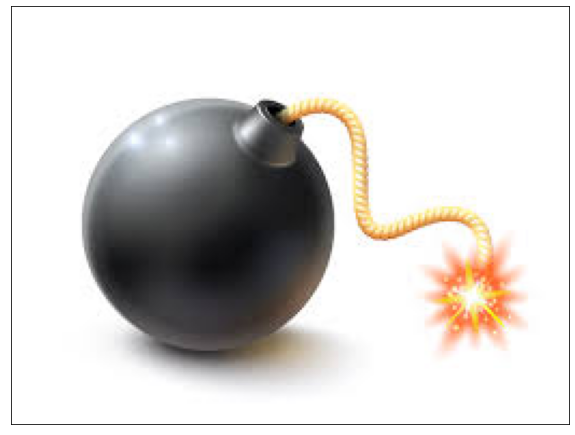

What would you like to examine?piano
What would you like to examine?queen bed
What would you like to examine?door b
Do you want to go to the next room? Enter 'yes' or 'no'yes
What would you like to examine?dresser
What would you like to examine?double bed
What would you like to examine?door b
Do you want to go to the next room? Enter 'yes' or 'no'yes
What would you like to examine?door c
Do you want to go to the next room? Enter 'yes' or 'no'yes
What would you like to examine?tv


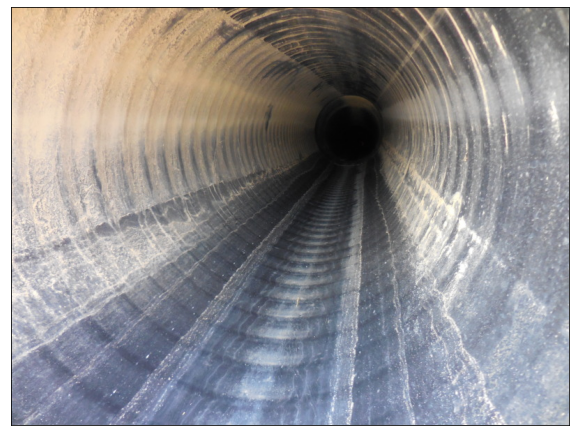

Do you want to go to the next room? Enter 'yes' or 'no'yes


NameError: name 'show' is not defined

In [3]:


couch = {
    "name": "couch",
    "type": "furniture",
}

door_a = {
    "name": "door a",
    "type": "door",
} 

door_b = {
    "name": "door b",
    "type": "door",
} 

door_c = {
    "name": "door c",
    "type": "door",
} 

shelf = {
    "name": "shelf",
    "type": "explosive",
} 

tv = {
    "name": "tv",
    "type": "door",
} 

blackbox = {
    "name": "black box",
    "type": "explosive",
} 

hole = {
    "name": "hole",
    "type": "explosive",
} 


devil = {
    "name": "the devil",
    "type": "character",
} 

key_a = {
    "name": "key for door a",
    "type": "key",
    "target": door_a,
}

key_b = {
    "name": "key for door b",
    "type": "key",
    "target": door_b,
}

key_c = {
    "name": "key for door c",
    "type": "key",
    "target": door_c,
}

remote_control = {
    "name": "remote control for tv",
    "type": "key",
    "target": tv,
}

piano = {
    "name": "piano",
    "type": "furniture",
}

game_room = {
    "name": "game room",
    "type": "room",
}

outside = {
  "name": "outside"
} #we may have to change this

# Object's first found in Bedroom 1 and new rooms it leads to

queen_bed = {
    "name": "queen bed",
    "type": "furniture",
}

double_bed = {
    "name": "double bed",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

dining_table = {
    "name": "dining table",
    "type": "furniture",
}

bedroom_1 = {
    "name": "bedroom 1",
    "type": "room",
}

bedroom_2 = {
    "name": "bedroom 2",
    "type": "room",
}

living_room = {
    "name": "living room",
    "type": "room",
}


underworld = {
    "name": "underworld",
    "type": "room",
}

all_rooms = [game_room, outside, bedroom_1, bedroom_2, living_room,underworld]  


all_doors = [door_a, door_b, door_c, tv] 



# define which items/rooms are related

object_relations = {
    "game room": [couch, piano, door_a], # These are the objects in game room
    "bedroom 1": [queen_bed, shelf, door_a, door_b, door_c],
    "bedroom 2": [double_bed, dresser,blackbox, door_b],
    "living room": [dining_table, hole, tv],
    "underworld":[devil],
    "piano": [key_a],
    "queen bed": [key_b], 
    "double bed": [key_c],
    "dresser": [remote_control],
    "door to bedroom 1": [door_a], 
    "door a": [game_room, bedroom_1], 
    "door to bedroom 2": [door_b], 
    "door b": [bedroom_1, bedroom_2], 
    "door to living room": [door_c], 
    "door c": [bedroom_1, living_room], 
    "door to outside": [tv], 
    "tv": [living_room, underworld]

} 

# define game state. Do not directly change this dict. 
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This 
# way you can replay the game multiple times.

INIT_GAME_STATE = {
    "current_room": game_room,
    "keys_collected": [],
    "target_room": outside
}

def read(sentence):
    engine = pyttsx3.init()
    engine.say(sentence)
    engine.runAndWait()

def show_picture(picture_path):
    img = mpimg.imread(picture_path)
    plt.figure(figsize=(10,10))
    imgplot = plt.imshow(img)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    plt.show()
    sleep(1)
    plt.close()
    

def linebreak():
    """
    Print a line break
    """
    print("\n\n")

def start_game():
    """
    Start the game
    """
    read("You wake up on a couch and find yourself in a strange house with no windows which you have never been to before. You don't remember why you are here and what had happened before. You feel some unknown danger is approaching and you must get out of the house, NOW!")
    play_room(game_state["current_room"])
        
        
def play_room(room):
    """
    Play a room. First check if the room being played is the target room.
    If it is, the game will end with success. Otherwise, let player either 
    explore (list all items in this room) or examine an item found here.
    """
    
    game_state["current_room"] = room
    current_room = game_state["current_room"]
    
    if(game_state["current_room"] == underworld):
        show_picture('devil.jpg')
        read("In this room you find the devil. He asks you 'Do you want to make a pact?'")
    
        answer = input("Enter 'yes' or 'no'").strip()
        
        if answer == 'yes':
            show_picture('unicorn.jpg')
            read("You find a unicorn. Hop on it and fly away. See you in another life!")
            
        elif answer == 'no':
            read("Groundhog day!")
            game_state.update({"keys_collected": []})
            play_room(game_room)
    
        else:
            play_room(current_room)        

    else:
        items = [i["name"] for i in object_relations[room["name"]]]
        read("This is the" + room["name"] + ". Here you see a " + ", ".join(items))
        examine_item(input("What would you like to examine?").strip())
        
    
            

def get_next_room_of_door(door, current_room):
    """
    From object_relations, find the two rooms connected to the given door.
    Return the room that is not the current_room.
    """
    connected_rooms = object_relations[door["name"]]
    for room in connected_rooms:
        if(not current_room == room):
            return room
        
        
def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if key hasn't been 
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains keys.
    Collect the key if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    
    current_room = game_state["current_room"]
    next_room = ""
    output = None
    
    for item in object_relations[current_room["name"]]:
        if(item["name"] == item_name):
            output = "You examine " + item_name + ". "
            if(item["name"] == "tv"):
                output += "You turn on the tv. It opens a portal"
                show_picture("portal.jpg")
                next_room = get_next_room_of_door(item, current_room) 
            
            elif(item["name"] == "couch" or item["name"] == "shelf" or item["name"] == "black box" or item["name"] == "hole"):
                show_picture('bomb.jpg')
                read("You stumbled upon a hidden bomb! It killed you. Back to the start!")
                game_state.update({"keys_collected": []})
                start_game()
            
            elif(item["type"] == "door"):
                have_key = False
                
                for key in game_state["keys_collected"]:
                    if(key["target"] == item):
                        have_key = True
                if(have_key):
                    output += "You unlock it with a key you have."
                    next_room = get_next_room_of_door(item, current_room)
                else:
                    output += "It is locked but you don't have the key."
            
            else:
                if(item["name"] in object_relations and len(object_relations[item["name"]])>0):
                    item_found = object_relations[item["name"]].pop()
                    game_state["keys_collected"].append(item_found)
                    output += "You find " + item_found["name"] + "."
                else:
                    output += "There isn't anything interesting about it."
            read(output)
            break

    if(output is None):
        read("That item doesn't exist.") 
   
    if(next_room and input("Do you want to go to the next room? Enter 'yes' or 'no'").strip() == 'yes'):
        play_room(next_room)    
    
    else:
        play_room(current_room)        
        
        
game_state = INIT_GAME_STATE.copy()

start_game()     